1. Gerekli kütüphaneler

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

2. Veri okuma

In [76]:
df = pd.read_csv("datasets/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Dont know,Maybe,No,No,No,No,No,Dont know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Dont know,No,No,Some of them,Yes,Yes,Yes,Dont know,No,NaN


3. Eksik Veri Kontrolü

In [77]:
df.info()
df.isnull().sum()

df.dropna(axis=1, thresh=len(df) * 0.9, inplace=True) 
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

4. Kategorik verileri sayısallaştırma

In [78]:
categorical_cols = df.select_dtypes(include=['object']).columns

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

5. Veri Ölçeklendirme

In [79]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

6. En uygun küme sayısını bulma

In [ ]:
inertia = []
silhouette_scores = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Elbow ve Silhouette Grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Analizi')

plt.tight_layout()
plt.show()

7. K-Means kümeleme

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

8. Performans Metrikleri

In [ ]:
sil_score = silhouette_score(df_scaled, cluster_labels)
db_score = davies_bouldin_score(df_scaled, cluster_labels)
ch_score = calinski_harabasz_score(df_scaled, cluster_labels)

print(f"Silhouette Skoru: {sil_score:.4f}")
print(f"Davies-Bouldin İndeksi: {db_score:.4f}")
print(f"Calinski-Harabasz İndeksi: {ch_score:.4f}")

Silhouette Skoru: 0.0893
Davies-Bouldin İndeksi: 2.8778
Calinski-Harabasz İndeksi: 90.4907


9. Küme Görselleştirme (PCA)

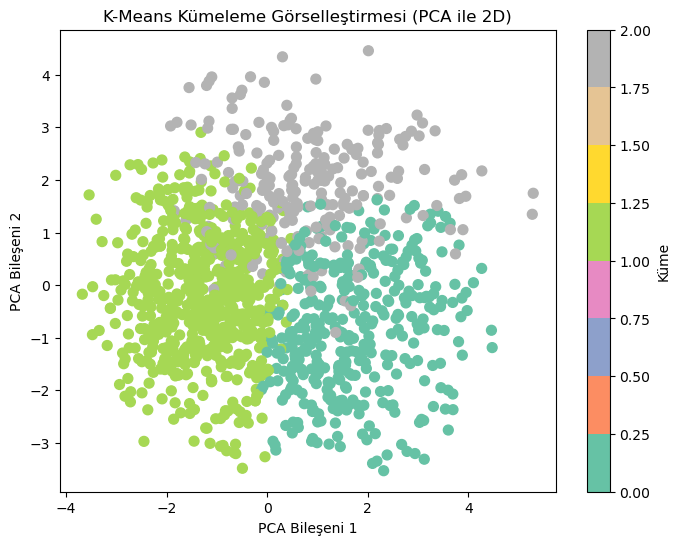

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='Set2', s=50)
plt.title("K-Means Kümeleme Görselleştirmesi (PCA ile 2D)")
plt.xlabel("PCA Bileşeni 1")
plt.ylabel("PCA Bileşeni 2")
plt.colorbar(label="Küme")
plt.show()

In [ ]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(reduced_data)
silhouette_score(reduced_data, cluster_labels)

0.1321681411699971